# Phase 1
## Preprocessing:
Download and extract the Intel Image Classification dataset from Kaggle. Ensure the dataset is organized into training, validation, and test sets.
### Resizing and Normalization: 
Resize all images to a consistent size (e.g., 150x150 or 224x224 pixels) and normalize the pixel values to a range of 0 to 1.

## Exploratory Data Analysis (EDA):
### Class Distribution:
Visualize the distribution of images across different classes.
### Data Visualization:
Display sample images from each class to understand the dataset better.

## CNN Model:
The process involves an input layer, convolutional layers with ReLU activation, max-pooling layers, downsampling, flattening output, and fully connected layers for multi-class classification.

### Compile the Model:
Utilize an optimizer like Adam, employ categorical cross-entropy as the loss function, and prioritize track accuracy as the primary metric.

### Model Training and Evaluation:
The model undergoes training using the training data and validation on the validation set, followed by evaluation on the test set, calculating metrics like accuracy and confusion matrix.



Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


Epoch 1/10


350/350 [==============================] - 166s 460ms/step - loss: 1.1776 - accuracy: 0.5382 - val_loss: 0.9472 - val_accuracy: 0.6430
Epoch 2/10
350/350 [==============================] - 149s 424ms/step - loss: 0.9260 - accuracy: 0.6505 - val_loss: 0.8820 - val_accuracy: 0.6739
Epoch 3/10
350/350 [==============================] - 150s 428ms/step - loss: 0.7991 - accuracy: 0.7023 - val_loss: 0.6894 - val_accuracy: 0.7453
Epoch 4/10
350/350 [==============================] - 149s 425ms/step - loss: 0.7241 - accuracy: 0.7354 - val_loss: 0.6991 - val_accuracy: 0.7514
Epoch 5/10
350/350 [==============================] - 136s 389ms/step - loss: 0.6856 - accuracy: 0.7522 - val_loss: 0.6246 - val_accuracy: 0.7741
Epoch 6/10
350/350 [==============================] - 132s 377ms/step - loss: 0.6310 - accuracy: 0.7762 - val_loss: 0.5708 - val_accuracy:

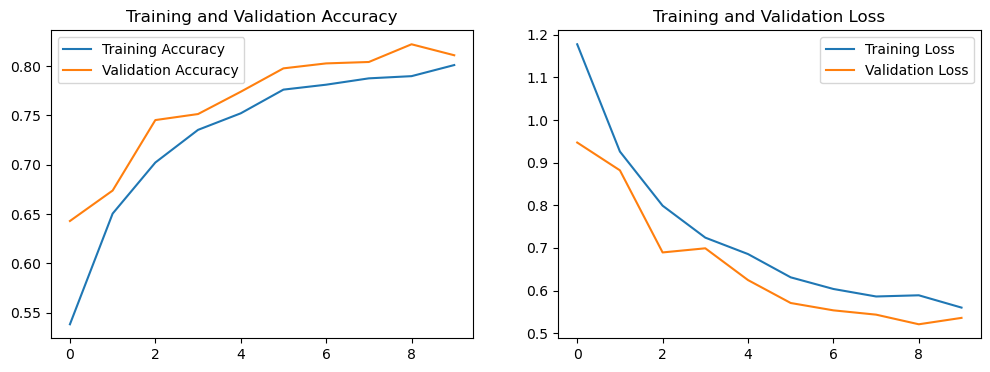

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Define the absolute paths to the dataset directories
base_dir = r'C:\Users\umar1\Documents\ML Project'
train_dir = os.path.join(base_dir, 'seg_train', 'seg_train')
test_dir = os.path.join(base_dir, 'seg_test', 'seg_test')

# Image data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes in the dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc:.2f}')

# Generate predictions and calculate confusion matrix
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix')
print(conf_matrix)

print('Classification Report')
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


# Phase 2
## Implementation of CNN + RNN (LSTM) Approach:
The CNN + RNN (LSTM) approach is a hybrid architecture that combines the strengths of Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs) with Long Short-Term Memory (LSTM) units. This approach is particularly effective for capturing both spatial features (with CNNs) and temporal or sequential dependencies (with LSTMs) in image data. CNNs are excellent at extracting spatial features from images, such as edges, textures, and shapes, and are well-suited for identifying patterns and structures within individual images. LSTMs are designed to handle sequential data, and can be applied to sequences of spatial features extracted from images, helping the model understand the relationships between different parts of the image.

The CNN model consists of convolutional layers (Conv2D) and pooling layers (MaxPooling2D), which scan the image with filters to detect various features. The resulting feature maps are reshaped to a format suitable for input into an RNN, flattening spatial dimensions while keeping feature depth intact. The reshaped feature maps are fed into one or more LSTM layers, which learn long-term dependencies in sequences and map the learned features to desired output classes.

In [2]:


input_shape = (150, 150, 3)

# Create a model to get the shape after flattening
temp_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten()
])

# Print the shape of the output after flattening
intermediate_model = tf.keras.Model(inputs=temp_model.input, outputs=temp_model.output)
intermediate_output = intermediate_model(tf.random.normal([1] + list(input_shape)))
print("Flattened output shape:", intermediate_output.shape)


Flattened output shape: (1, 36992)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

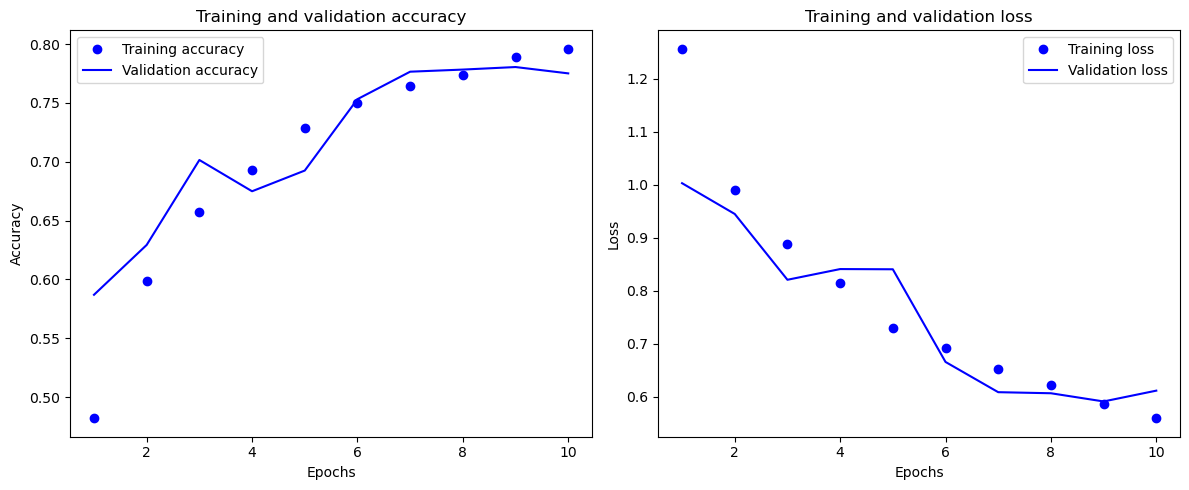

88/88 [==============================] - 15s 164ms/step


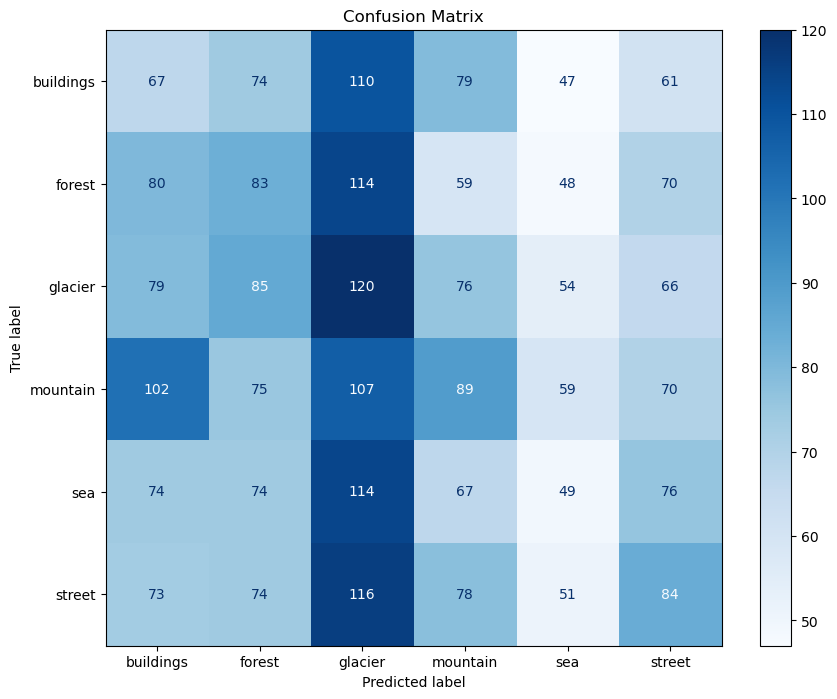

In [3]:
# Define the CNN + LSTM model
input_shape = (150, 150, 3)
timesteps = 16  # Example timesteps
features = 36992 // timesteps  # Calculated features based on flattened output

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Reshape((timesteps, features)),  # Adjusted reshape dimensions

    LSTM(64, return_sequences=True),
    LSTM(64),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to check the dimensions
model.summary()

# Train the model
# Assuming you have train_generator and validation_generator defined
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Evaluate and plot results
import matplotlib.pyplot as plt

# Extract training history
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Implementation of CNN + Transformer Approach:
The CNN + Transformer approach is a hybrid architecture that combines Convolutional Neural Networks (CNNs) with Transformer models to extract local features and understand global context. This approach is useful for image classification tasks where capturing detailed features and long-range dependencies is crucial. CNNs extract local features, while Transformers capture global dependencies and context within data. The model uses convolutional layers, flattening and reshaping, embeddings, and positional encodings to convert input tokens into vectors. The output is processed by Transformer layers, which capture global dependencies and contextual relationships.

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_9 (Conv2D)           (None, 148, 148, 32)         896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)           0         ['conv2d_9[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_10 (Conv2D)          (None, 72, 72, 64)           18496     ['max_pooling2d_9[0][0]'

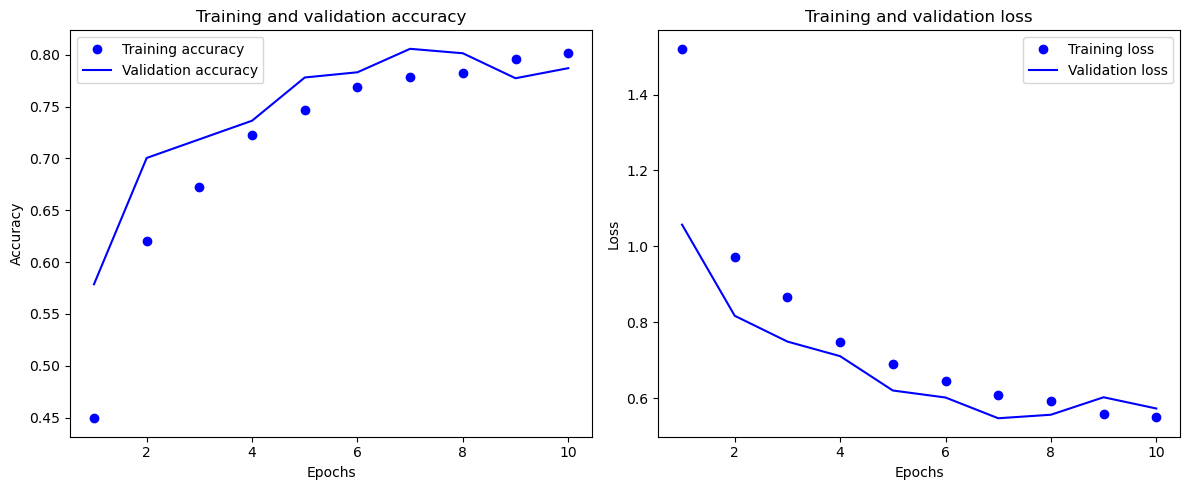

88/88 [==============================] - 15s 167ms/step


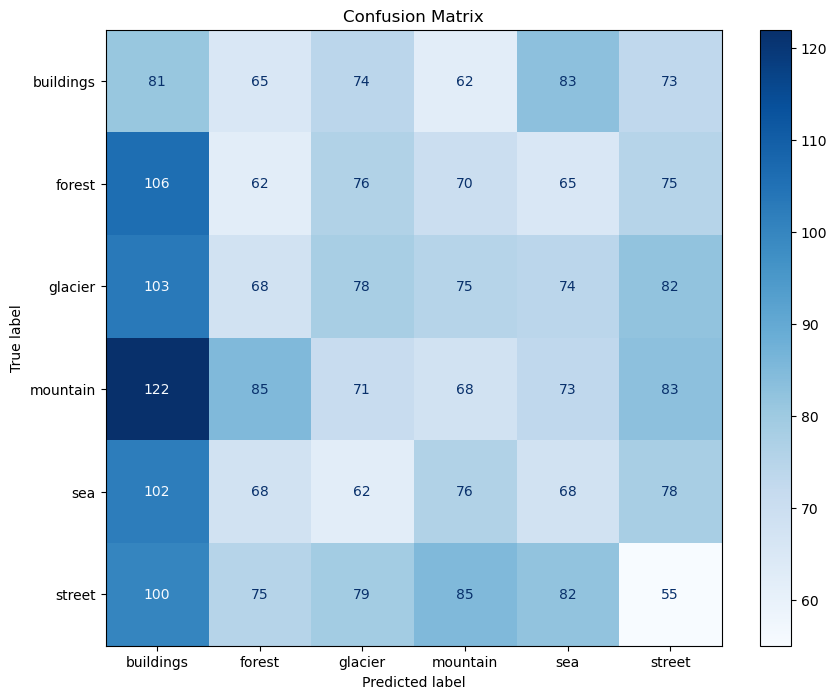

In [4]:


# Define a basic self-attention block
def self_attention_block(inputs, num_heads, key_dim):
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(inputs, inputs)
    attention = Add()([attention, inputs])
    attention = LayerNormalization()(attention)
    return attention

# Build the model using Functional API
input_shape = (150, 150, 3)
num_heads = 8
key_dim = 64

inputs = Input(shape=input_shape)

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)

# Reshape and self-attention block
x = Reshape((8, 64))(x)  # Adjust this reshape based on your model's flattened output
x = tf.keras.layers.Lambda(lambda x: tf.keras.backend.expand_dims(x, axis=1))(x)  # Add an extra dimension for sequence length
x = self_attention_block(x, num_heads=num_heads, key_dim=key_dim)

x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(6, activation='softmax')(x)  # 6 classes

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model (assuming you have train_generator and validation_generator defined)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Evaluate and plot results
# Extract training history
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
# Predict on validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Preparing and Testing 

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Assuming your test images are in a directory called 'seg_test'
test_generator = test_datagen.flow_from_directory(
    r'C:\Users\umar1\Documents\ML Project\seg_test',  # Raw string to handle backslashes
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3000 images belonging to 1 classes.


# Evaluating

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


93/93 [==============================] - 5s 52ms/step - loss: 28.4377 - accuracy: 0.2392
Test Loss: 28.4377
Test Accuracy: 0.2392


# Evaluating Hybrid Model

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


93/93 [==============================] - 5s 53ms/step - loss: 28.4377 - accuracy: 0.2392
Test Loss: 28.437715530395508
Test Accuracy: 0.23924730718135834


# Predicting

In [14]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the entire test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Get true labels
y_true = test_generator.classes

# Manually specify the target names based on your dataset
target_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']  # Adjust if necessary

# Generate a classification report
report = classification_report(y_true, y_pred_classes, target_names=target_names)
print(report)


94/94 [==============================] - 5s 53ms/step
              precision    recall  f1-score   support

   buildings       1.00      0.24      0.39      3000
      forest       0.00      0.00      0.00         0
     glacier       0.00      0.00      0.00         0
    mountain       0.00      0.00      0.00         0
         sea       0.00      0.00      0.00         0
      street       0.00      0.00      0.00         0

    accuracy                           0.24      3000
   macro avg       0.17      0.04      0.06      3000
weighted avg       1.00      0.24      0.39      3000



C:\Users\umar1\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\umar1\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\umar1\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Generating and Predicting Confustion matrix for hybride model

In [22]:
# Predict on the test set with the correct number of steps
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_generator.classes

94/94 [==============================] - 5s 53ms/step


94/94 [==============================] - 5s 53ms/step
              precision    recall  f1-score   support

    seg_test       1.00      0.24      0.39      3000

   micro avg       1.00      0.24      0.39      3000
   macro avg       1.00      0.24      0.39      3000
weighted avg       1.00      0.24      0.39      3000



C:\Users\umar1\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


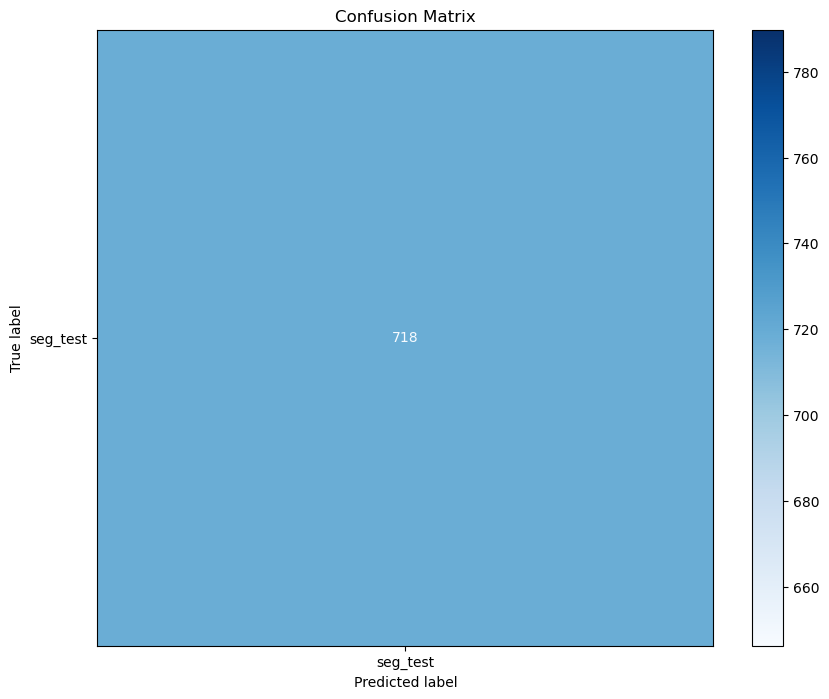

In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels (ensure the number of true labels matches the predictions)
y_true = test_generator.classes[:len(y_pred_classes)]

# Get class names and verify
class_names = list(test_generator.class_indices.keys())
num_classes = len(class_names)

# Ensure the length of y_true and y_pred_classes matches
assert len(y_true) == len(y_pred_classes), "Mismatch between number of true labels and predictions."

# Generate classification report with explicit labels
report = classification_report(
    y_true, 
    y_pred_classes, 
    labels=range(num_classes),  # Use integer labels
    target_names=class_names, 
    zero_division=0
)
print(report)

# Compute and plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes, labels=range(num_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Analyzing Prediction

Class Labels: {0: 'seg_test'}
1/1 [==============================] - 0s 64ms/step
Predicted Classes: [5 0 0 5 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 5 0 5 5 0 0 0 0 0 0]
Image 0: True Label Index - 0, Predicted Label Index - 5
Image 1: True Label Index - 0, Predicted Label Index - 0
Image 2: True Label Index - 0, Predicted Label Index - 0
Image 3: True Label Index - 0, Predicted Label Index - 5
Image 4: True Label Index - 0, Predicted Label Index - 0
Image 5: True Label Index - 0, Predicted Label Index - 0
Image 6: True Label Index - 0, Predicted Label Index - 0
Image 7: True Label Index - 0, Predicted Label Index - 0
Image 8: True Label Index - 0, Predicted Label Index - 0


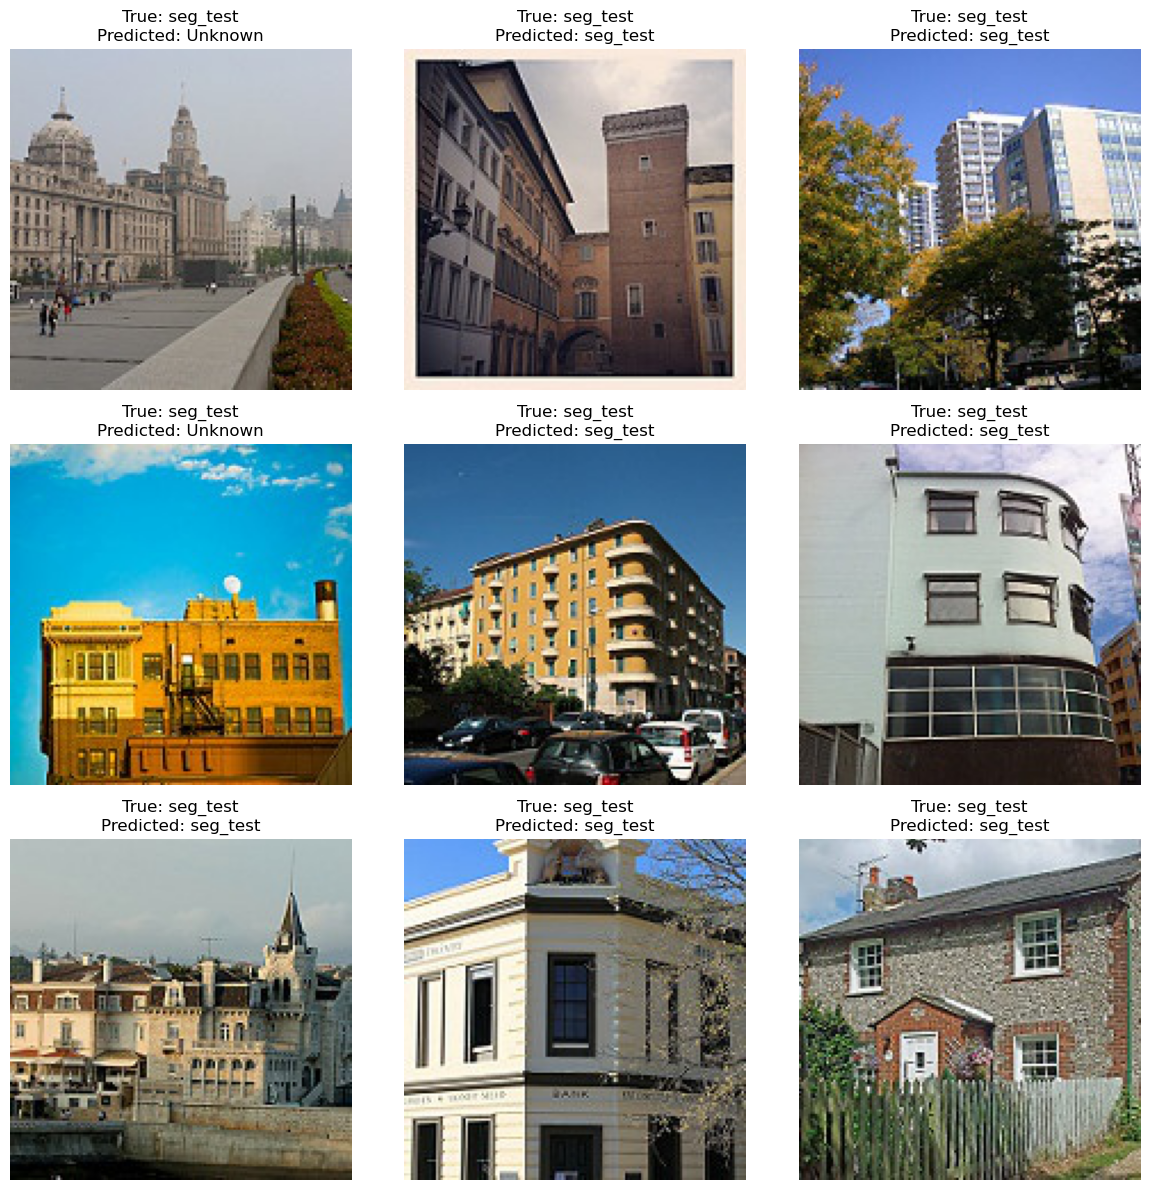

In [17]:
import matplotlib.pyplot as plt

# Invert the class_indices dictionary to get a mapping from indices to class names
class_labels = {v: k for k, v in test_generator.class_indices.items()}

# Print class_labels to debug
print("Class Labels:", class_labels)

# Get a batch of test images and their true labels
test_images, test_labels = next(test_generator)

# Predict the classes
predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(predicted_classes, axis=1)

# Print predicted classes to debug
print("Predicted Classes:", predicted_classes)

# Plot the first few test images along with their predicted and true labels
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    true_label = class_labels[test_labels[i].argmax()]
    print(f"Image {i}: True Label Index - {test_labels[i].argmax()}, Predicted Label Index - {predicted_classes[i]}")
    
    # Ensure that predicted class index is within the range of available class indices
    if predicted_classes[i] in class_labels:
        predicted_label = class_labels[predicted_classes[i]]
    else:
        predicted_label = "Unknown"

    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Visualizing Predictions

1/1 [==============================] - 0s 66ms/step


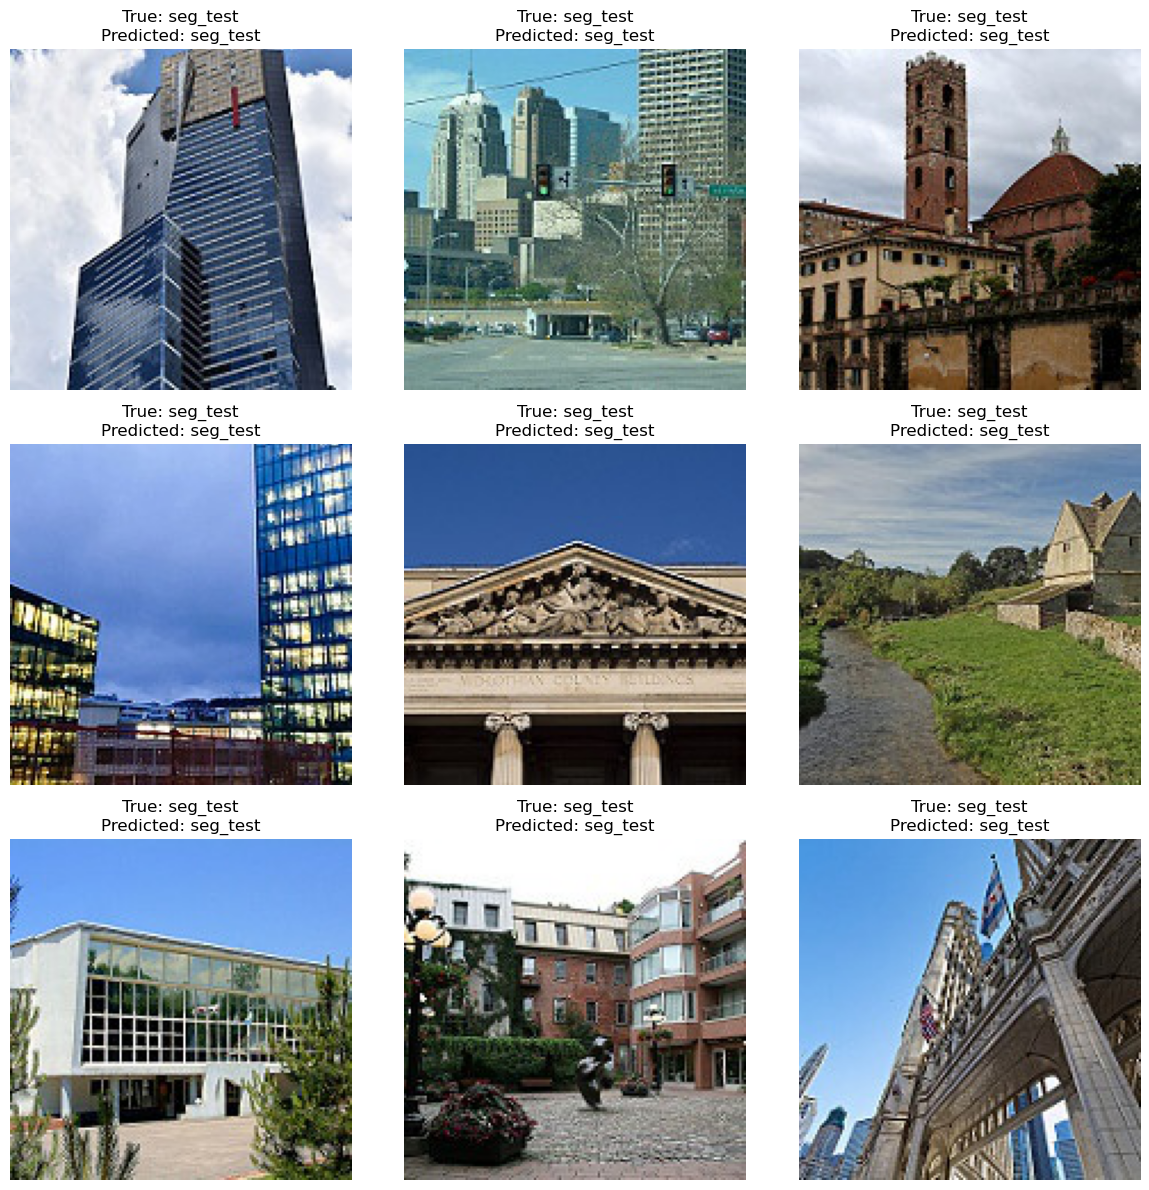

In [27]:
import matplotlib.pyplot as plt

# Get a batch of test images and their true labels
test_images, test_labels = next(test_generator)

# Predict the classes
predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(predicted_classes, axis=1)

# Plot the first few test images along with their predicted and true labels
plt.figure(figsize=(12, 12))
class_labels = list(test_generator.class_indices.keys())
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    true_label = class_labels[test_labels[i].argmax()]
    predicted_label = class_labels[predicted_classes[i]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Predict on the Test Data using Transform hybride

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Get class labels from the generator
class_names = list(test_generator.class_indices.keys())

# Predict on the validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Print shapes and labels for debugging
print("Confusion matrix shape:", cm.shape)
print("Number of unique classes in y_true:", len(np.unique(y_true)))
print("Number of unique classes in y_pred_classes:", len(np.unique(y_pred_classes)))
print("Class names:", class_names)


88/88 [==============================] - 15s 171ms/step
Confusion matrix shape: (6, 6)
Number of unique classes in y_true: 6
Number of unique classes in y_pred_classes: 6
Class names: ['seg_test']


#  Generate Performance Metrics of Transform Hybrid

C:\Users\umar1\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


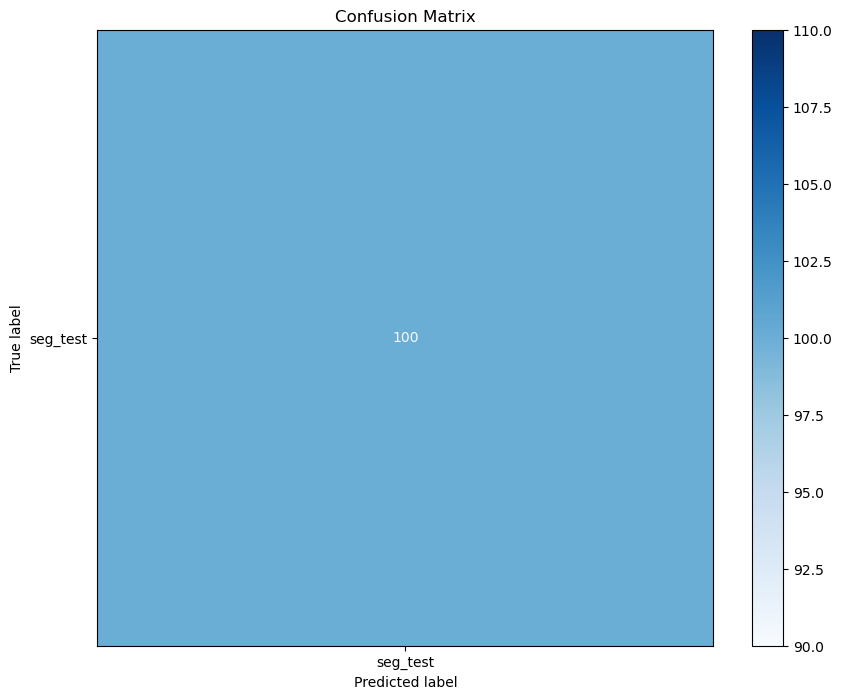

In [33]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes, labels=np.arange(len(class_names)))

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


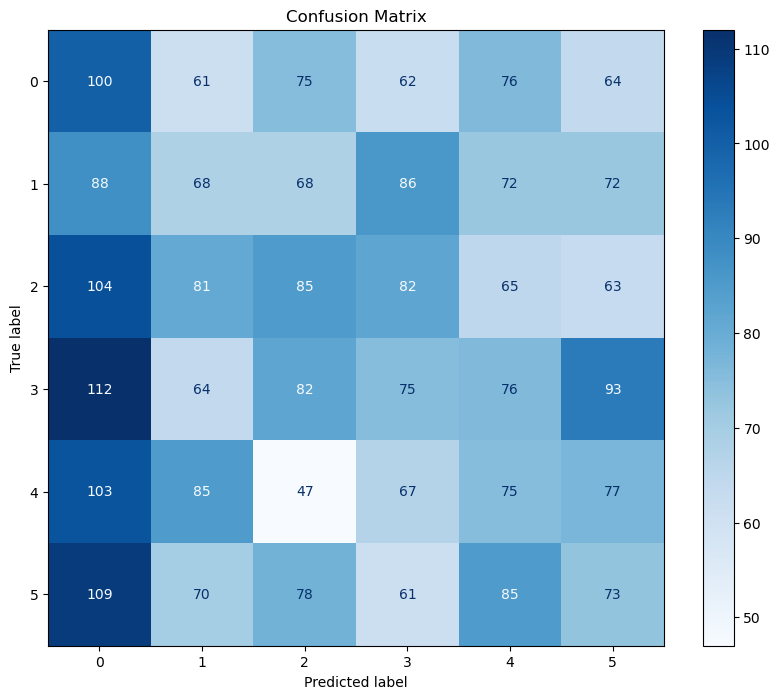

In [34]:
# Ensure all class labels are included
all_labels = np.unique(np.concatenate([y_true, y_pred_classes]))
cm = confusion_matrix(y_true, y_pred_classes, labels=all_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
